<a href="https://colab.research.google.com/github/gmortuza/machine-learning/blob/master/models/regression/linear_regression/Linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/gmortuza/machine-learning/blob/master/2.%20Machine%20Learning/2.1%20Regression/Linear%20regression.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Linear regression
Linear regression is one of the most widely used machine learning model. In this notebook we will see how to use implement linear regression using the python. We will use boston housing price datasets to validate our algorithm. 
### Hypothesis
To perform supervised learning, we must decide how we're going to represent functions/hypothesis $ h $ in a computer. As an initial choice lets say we decide to approximate $ y $ as a linear function of $ x $.
$$ y = h_w(x) = w_0 + w_1x_1 + w_2x_2 + ..... $$
Here $ w_i $ are the **parameters**(also called **weights**) parameterizing the space of linear functions mapping from $ \mathcal{X} $ to $ \mathcal{Y} $. Here, $ x_i $ represent the input feature and $ w_i $ represent how important that particular feature is for the output. For example size of the house might be the most important feature for the price so weight related this feature will be higher.  We can write the equations more compactly:
$$ h(x) = \sum_{i=0}^nw_ix_i = w^Tx $$
There are multiple ways of updating the weights. For example gradient descent, using normal equations, newton's method etc.
### Cost function
We need to set $ w $ in a way that it makes the value of $ h(x) $ close to $ y $, at least for a single training example. We can do that by reducing the mean square loss between $ h(x) $ and $ y $. So we will keep updating the value of $ w $ untill $ (h(x) - y)^2 \approx 0 $. This is a loss function for a single training example. For $ m $ training example the **Cost function** will be
$$ J(w) = \frac{1}{2}\sum_{i=0}^m(h_w(x^{(i)}) - y^{(i)})^2 $$

## Implement the model

In [ ]:
# Import the required module
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score

### Gradient descent
$$ w_j := w_j - \alpha \frac{\partial{J(w)}}{\partial{w}} $$
$$ \frac{\partial{J(w)}}{\partial{w}} = \sum_{i=1}^m(h_w(x^{(i)}) - y^{(i)})x_j^{(i)} $$
So the update rule for the gradient descent will be
$$
\text{Repeat until convergence}\{ \\
   \;\;\;\;\;\; w_j := w_j - \alpha \sum_{i=1}^m(h_w(x^{(i)}) - y^{(i)})x_j^{(i)} \\
\} 
$$

In [ ]:
def propagate(w, b, x, y):
    m = x.shape[0]
    # Calculating cost
    h_x = np.dot(x, w) + b
    cost = np.sum((h_x - y) ** 2) / 2
    cost = np.squeeze(cost)

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(x.T, (h_x - y)) / m
    db = np.sum(h_x - y) / m

    return dw, db, cost

In [ ]:
def optimize(w, b, x, y, learning_rate, num_iteration, verbose):
    costs = {}
    for i in range(num_iteration):
        dw, db, cost = propagate(w, b, x, y)
        # Updating parameter
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs[i] = cost
            if verbose:
                print("Cost after iteration ", i, " is ", cost)
    return w, b, costs


### Normal equation
By using the an equation we can find the value of $ w $ that will minimize the $ J(w) $. The equation can be derived by using the property of linear algebra.

$$
w = (X^TX)^{-1}X^T\vec{v}
$$

In [ ]:
def optimize_by_normal_equation(x, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

### Combine all

In [ ]:
def predict(w, b, x):
    return np.dot(x, w) + b

In [ ]:
def model(x_train, y_train, x_test, y_test, method="gradient_descent", learning_rate=0.001, num_iteration=5000, verbose=False):
    # Resizing the y input
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    # initialize parameters with zeros
    w = np.zeros((x_train.shape[1], 1))
    b = 0

    w, b, costs = optimize(w, b, x_train, y_train, learning_rate, num_iteration, verbose)
    if method == "normal_equation":
        w = optimize_by_normal_equation(x_train, y_train)
    y_prediction_train = predict(w, b, x_train)
    y_prediction_test = predict(w, b, x_test)
    train_r1 = r2_score(y_train, y_prediction_train)
    test_r1 = r2_score(y_test, y_prediction_test)
    print("Train f1 score: ", train_r1)
    print("Test f1 score: ", test_r1)

    return {"costs": costs,  "train_f1": train_r1, "test_f1": test_r1}

## Test our model

Train f1 score:  0.7426457448245715
Test f1 score:  0.6727000429784762


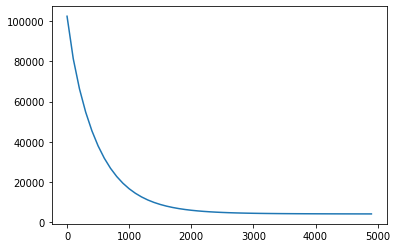

In [ ]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
history = model(X_train, y_train, X_test, y_test)
plt.plot(list(history["costs"].keys()), list(history["costs"].values()))
plt.show()

In [ ]:
# Test with normal equation
history = model(X_train, y_train, X_test, y_test, method="normal_equation")

Train f1 score:  0.7511784126285308
Test f1 score:  0.6762276430987266


## Compare with sikit learn

In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
print("Train r2 score: ", r2_score(y_train, linearRegression.predict(X_train)))
print("Test r2 score: ", r2_score(y_test, linearRegression.predict(X_test)))

Train r2 score:  0.75142102292153
Test r2 score:  0.6760908223042545


## Locally weighted linear regression
By linear regression it is not possible to predict the output of any dataset if the dataset doesn't maintain linear relationship between input and output. Locally weighted linear regression can be a great help in this case. it doesn't consider the entire dataset for prediction. Instead it only use the dataset which are close to the input which need to be predicted. For example, If we forcast the weather of 1st january, 2020 and if we use the linear regression it will take the every month's weather into consideration. But it would be best if we only consider the weather of nearby date of 1st january. 
![Locally weighted linear regression](https://github.com/gmortuza/machine-learning/blob/master/models/regression/linear_regression/img/locally_weighted.png?raw=1)
It is impossible to fit linear line into this dataset but it is possible to fit a non-linear line into this dataset. It is a **non-parametric** learning algorithm . (Algorithms that do not make strong assumptions about the form of the mapping function are called nonparametric machine learning algorithms. By not making assumptions, they are free to learn any functional from the training data.) Linear regression is **parametric** learning algorithm where we learn the mapping function/hypothesis and throws away the training data.

In linear regression we fit $ w $ to minimzie:
$$ \sum_{i=1}^m(y^{(i)} - w^Tx^{(i)})^{(i)} $$
In locally weighted linear regression we will fit $ w $ to minimize:
$$ \sum_{i=1}^m\mathcal{l}^{(i)}(y^{(i)} - w^Tx^{(i)})^{(i)} $$
$$ \mathcal{l}^{(i)} = exp(- \frac{(x^{(i)} - x)^2}{2\tau^2}) $$
Here $ x $ is the input for which we want to predict output. $ \mathcal{l}^{(i)} \approx 1 $ if $ |x^{(i)} - x| $ is small. And for training example nearby $ x $, $ |x^{(i)} - x| $ will be small. So those point will be consider for prediciton only. $ \tau $ is called the **bandwidth** parameter. It's hypyerparameter that will tell the algorithm about how many training example it should consider for prediction.